<font size="5" color="#8b1900"  face="verdana"> <B>1. Import packages</B></font>

In [1]:
# MODULE                                                        # DESCRIPTION     
import numpy as np                                              # scientific computing 
import matplotlib as mtp                                        # create visualizations
import matplotlib.pyplot as plt                                 # create visualizations
import pandas as pd                                             # data analysis and manipulation
import geopandas as gpd                                         # extends the datatypes used by pandas to allow spatial operations on geom. types
import snappy                                                   # SNAP python interface
import rasterio                                                 # Rasterio reads and writes raster formats and provides a Python API based 
import re
from datetime import datetime
import shapely
from shapely import geometry
from pathlib import Path
from IPython.display import clear_output

# turns on 'nline plotting', where plot graphics will appear in the notebook below the cell that produced them.
%matplotlib inline              

# Change module setting
pd.options.display.max_colwidth = 80       # Longer text in pd.df

<font size="5" color="#8b1900"  face="verdana"> <B>2. Set parameters</B></font>

In [2]:
field = ['WF1', 'MF1', 'UF1', 'WF2']
selection = 'SCDS'
drop = [1, 2, 3]
approach = ['A1', 'A2', 'A3']
dr = drop[0]
a = 'A2'

def get_drop(num):
    if num == 1:
        return 'LIA'
    elif num == 2:
        return 'LIA_CDVH'
    elif num == 3:
        return 'LIA_DOY_CDVH'

<font size="5" color="#8b1900"  face="verdana"> <B>3. Perform temporal analysis</B></font>

,NDVI_MODIS,NDVI_LABEL
A2_SCDS_LIA_WF1,0.483501,0.358014
A2_SCDS_LIA_MF1,0.423752,0.247524
A2_SCDS_LIA_UF1,0.613398,0.642441
A2_SCDS_LIA_WF2,0.601627,0.205586


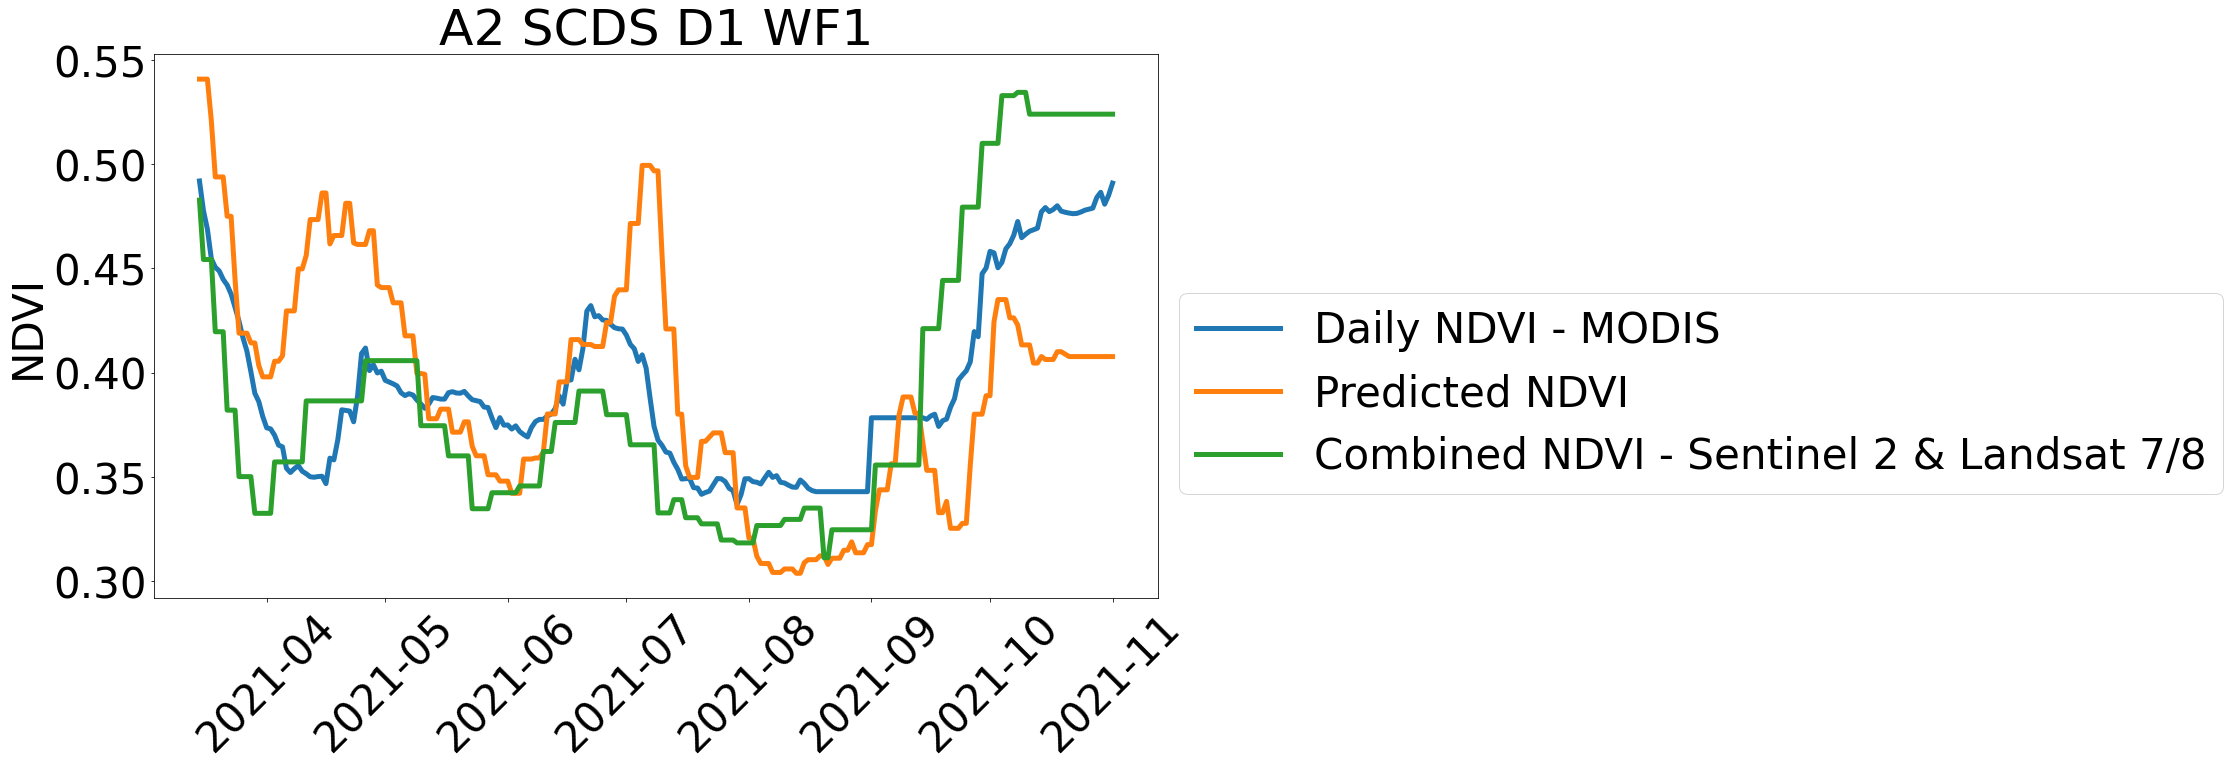

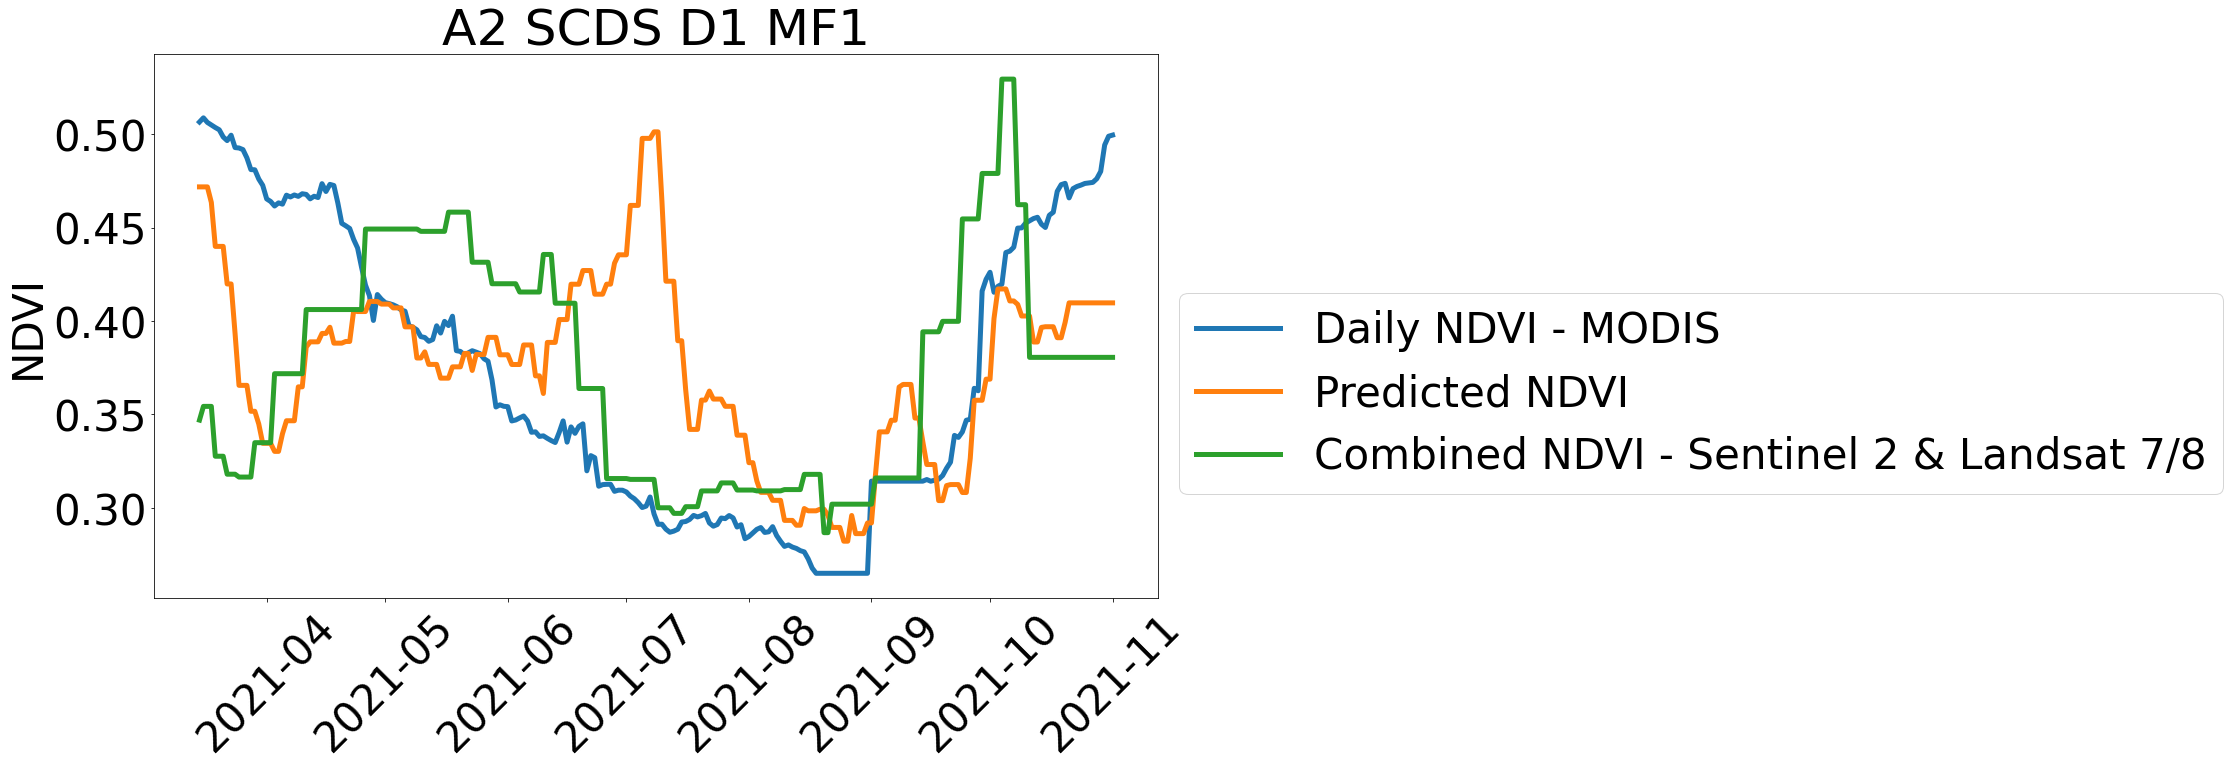

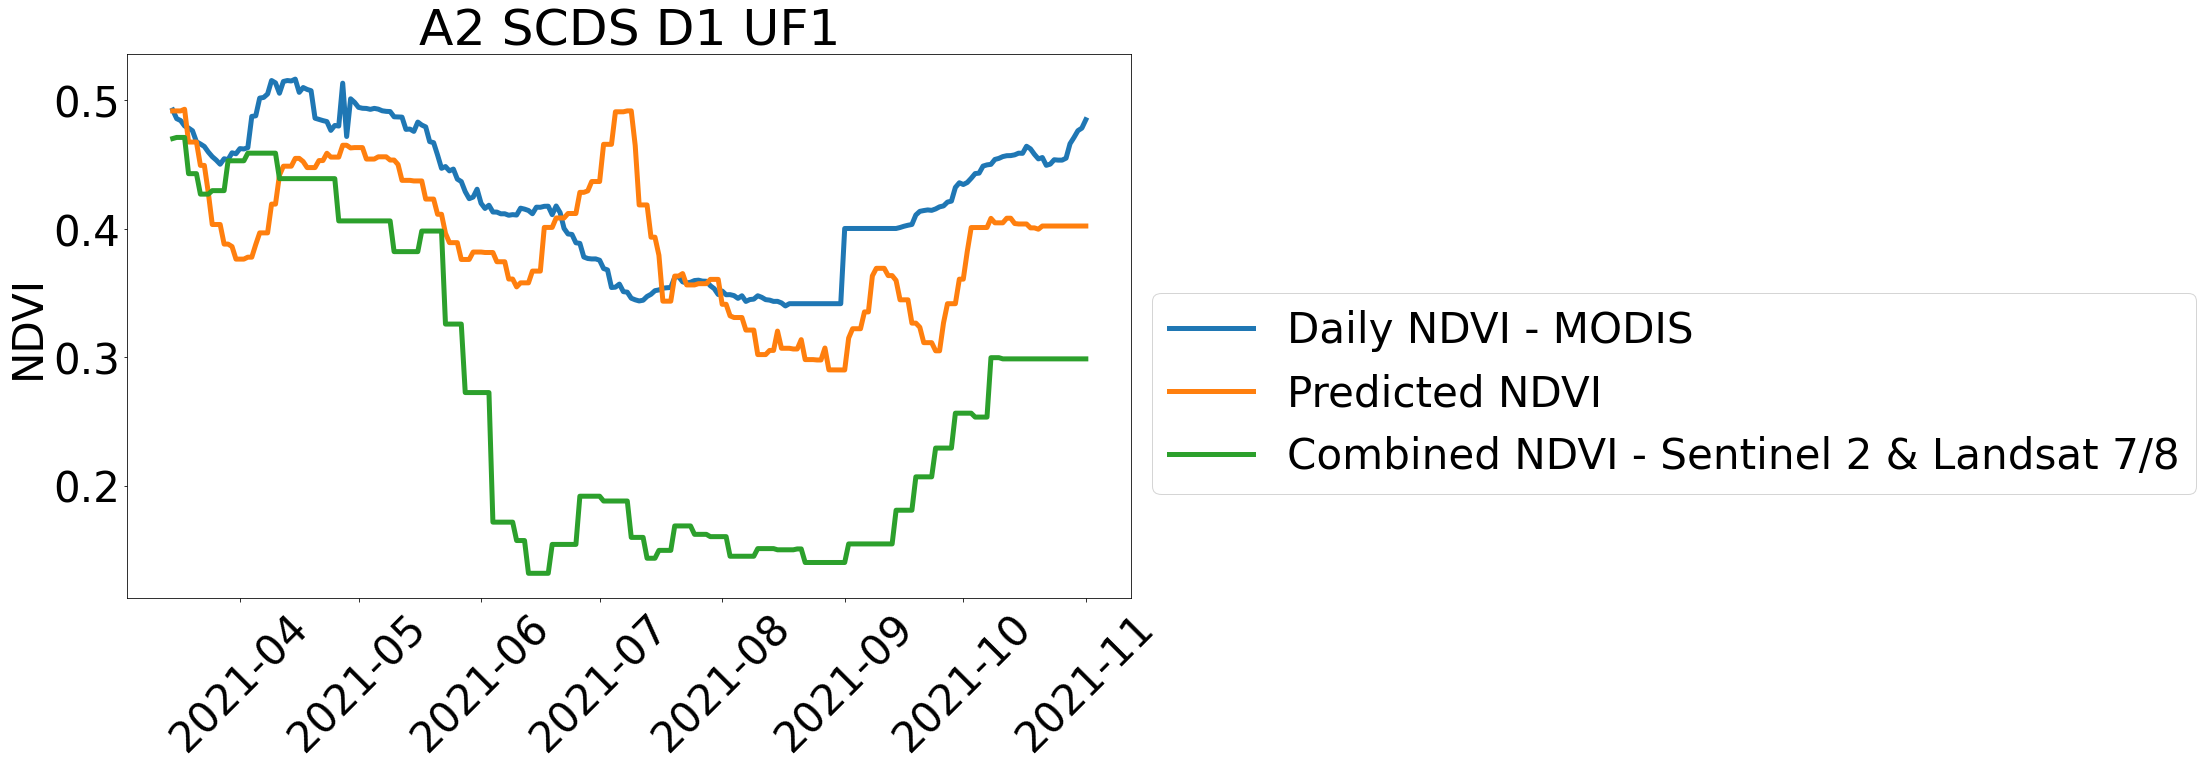

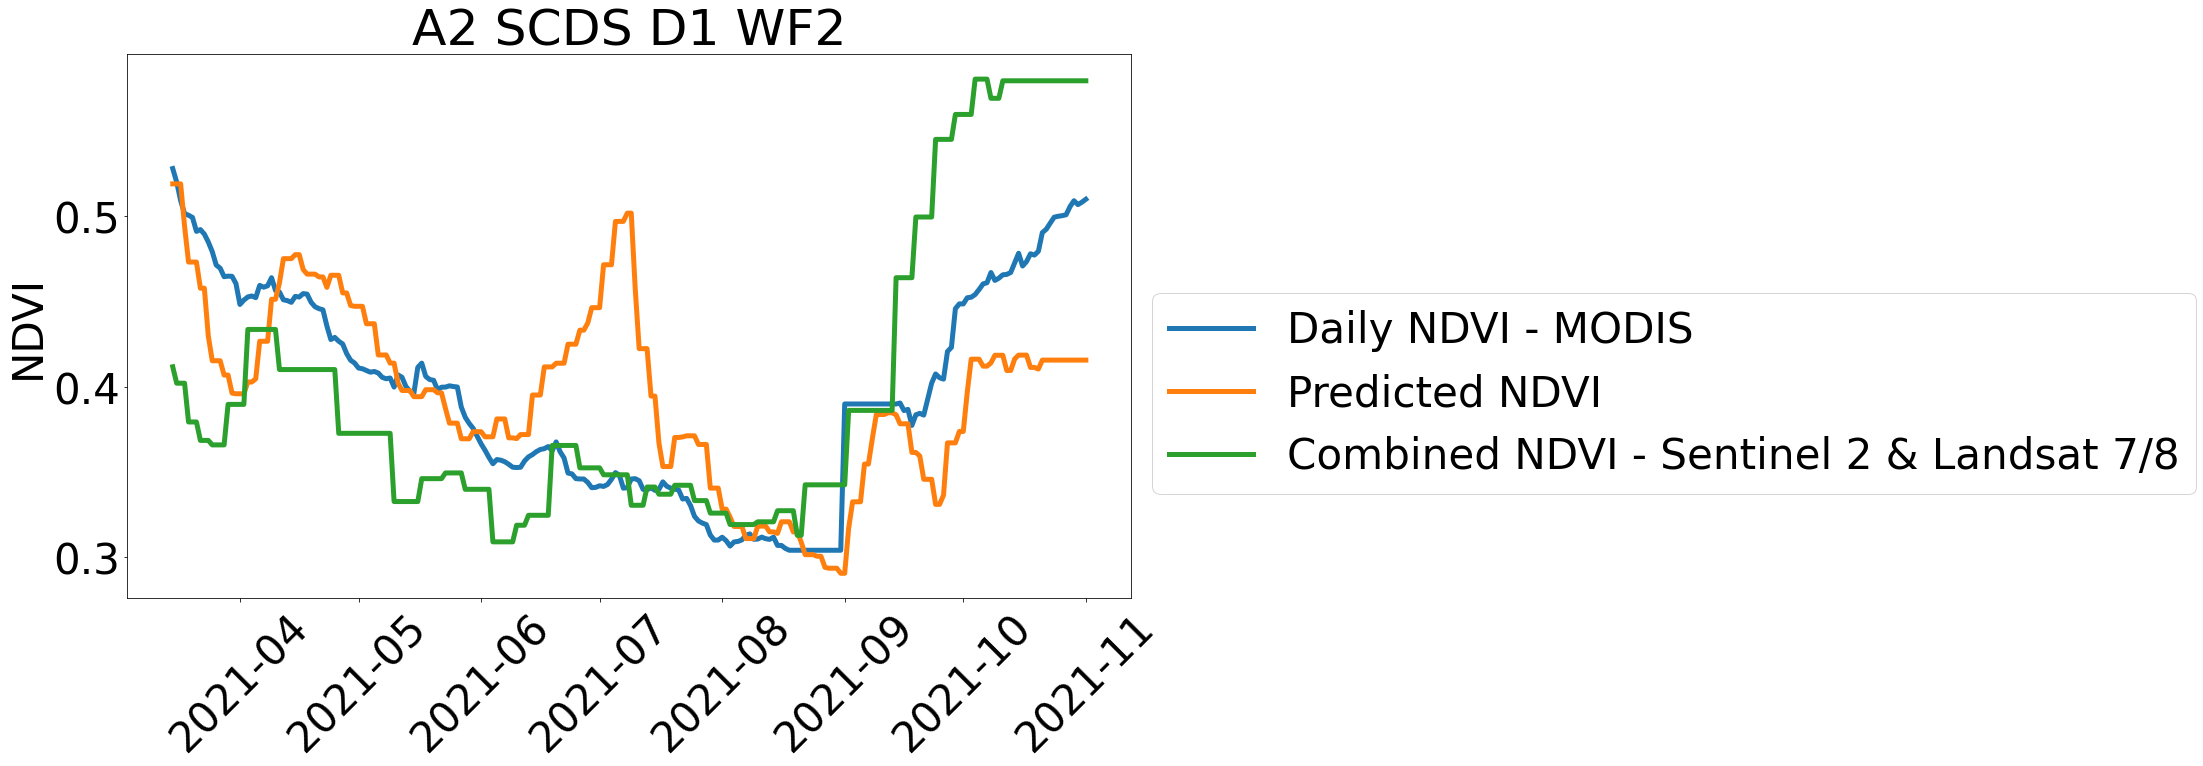

In [3]:
best_method = pd.DataFrame()
for f in field:
    #for dr in drop:
    #for a in approach:
        clear_output(wait=True)
        Predicted_NDVI = './Validation/Stacks/'+a+'/'+selection+'/'+selection+'_'+get_drop(dr)+'_Stack.tif'
        NDVI_Stack_msk = './Validation/Stacks/NDVI_Stack_'+f+'.tif'
        ndvi_modis_points = './Validation/MODIS-3-NDVI_'+f+'.csv'
        ndvi_s2_points = './Validation/S2_'+f+'.csv'
        wine_field_1 = './Validation/'+f+'_pts.csv'
        Path(Predicted_NDVI).stem
        
        cols_align = [0, 55, 1, 56, 2, 57, 3, 58, 4, 59, 5, 60, 6, 61, 7, 62, 8, 63, 9, 64, 10, 65, 11, 66, 12, 13, 67, 14, 68, 15, 16, 69, 17, 70, 18, 19, 71, 72, 20, 73, 21, 74, 75, 22, 23, 76, 24, 77, 25, 26, 78, 27, 79, 28, 80, 29, 81, 30, 82, 31, 32, 83, 84, 33, 85, 34, 86, 35, 87, 36, 88, 37, 89, 38, 90, 39, 91, 40, 92, 41, 93, 42, 94, 43, 95, 44, 96, 45, 97, 46, 98, 47, 99, 48, 100, 49, 101, 50, 102, 51, 103, 52, 104, 53, 105, 54]#, 106]
        cols_align = [x-1 for x in cols_align]
        cols_align =  ['band_1_S'+str(x) for x in cols_align]
        cols_align[0] = 'band_1_M'
        
        cust_date = ['17.03.2021', '18.03.2021', '19.03.2021', '23.03.2021', '24.03.2021', '25.03.2021', '29.03.2021', '30.03.2021', '31.03.2021', '04.04.2021', '05.04.2021', '06.04.2021', '10.04.2021', '11.04.2021', '12.04.2021', '16.04.2021', '17.04.2021', '18.04.2021', '22.04.2021', '23.04.2021', '24.04.2021', '28.04.2021', '29.04.2021', '30.04.2021', '05.05.2021', '06.05.2021', '10.05.2021', '11.05.2021', '12.05.2021', '17.05.2021', '18.05.2021', '22.05.2021', '23.05.2021', '24.05.2021', '29.05.2021', '30.05.2021', '04.06.2021', '05.06.2021', '09.06.2021', '10.06.2021', '11.06.2021', '16.06.2021', '17.06.2021', '22.06.2021', '23.06.2021', '27.06.2021', '28.06.2021', '29.06.2021', '04.07.2021', '05.07.2021', '09.07.2021', '10.07.2021', '11.07.2021', '15.07.2021', '16.07.2021', '17.07.2021', '21.07.2021', '22.07.2021', '23.07.2021', '28.07.2021', '29.07.2021', '02.08.2021', '03.08.2021', '04.08.2021', '09.08.2021', '10.08.2021', '14.08.2021', '15.08.2021', '16.08.2021', '20.08.2021', '21.08.2021', '22.08.2021', '26.08.2021', '27.08.2021', '28.08.2021', '01.09.2021', '02.09.2021', '03.09.2021', '07.09.2021', '08.09.2021', '09.09.2021', '13.09.2021', '14.09.2021', '15.09.2021', '19.09.2021', '20.09.2021', '21.09.2021', '25.09.2021', '26.09.2021', '27.09.2021', '01.10.2021', '02.10.2021', '03.10.2021', '07.10.2021', '08.10.2021', '09.10.2021', '13.10.2021', '14.10.2021', '15.10.2021', '19.10.2021', '20.10.2021', '21.10.2021', '25.10.2021', '26.10.2021', '27.10.2021', '31.10.2021', '01.11.2021']
        cust_date = [datetime.strptime(x, '%d.%m.%Y') for x in cust_date]

        ndvi_date = ['15.03.2021', '16.03.2021', '20.03.2021', '23.03.2021', '25.03.2021', '31.03.2021', '04.04.2021', '16.04.2021', '04.05.2021', '14.05.2021', '19.05.2021', '26.05.2021', '29.05.2021', '08.06.2021', '11.06.2021', '13.06.2021', '23.06.2021', '28.06.2021', '05.07.2021', '12.07.2021', '13.07.2021', '18.07.2021', '21.07.2021', '28.07.2021', '29.07.2021', '06.08.2021', '12.08.2021', '17.08.2021', '21.08.2021', '22.08.2021', '11.09.2021', '16.09.2021', '21.09.2021', '26.09.2021', '01.10.2021', '06.10.2021', '09.10.2021', '11.10.2021', '25.10.2021', '26.10.2021']
        ndvi_date = [datetime.strptime(x, '%d.%m.%Y') for x in ndvi_date]

        idx = pd.date_range('2021-03-15', '2021-11-01')
        
        def moving_average(a, n=3):
            ret = np.cumsum(a, dtype=float)
            ret[n:] = ret[n:] - ret[:-n]
            return ret[n - 1:] / n
        
        def get_field_pts():
            src_pred = rasterio.open(Predicted_NDVI)
            prep_vis = snappy.ProductIO.readProduct(Predicted_NDVI)
            bands_wf = list(prep_vis.getBandNames())
            img_pred = src_pred.read()
            profile = src_pred.profile  
            memfile = rasterio.io.MemoryFile()
            with memfile.open(**profile) as dst:
                for i in range(0,src_pred.count):
                    dst.write(img_pred[i], i+1)
            dats = memfile.open()
            dats.profile
            df = pd.read_csv(wine_field_1, sep=';')
            gdf = gpd.GeoDataFrame(df, geometry=[geometry.Point(x,y) for x,y in zip(df.LONGITUDE, df.LATITUDE)])
            wine_field_pts = gdf.sample(frac=1).reset_index(drop=True)
            wine_field_pts.index = range(len(wine_field_pts))
            coords = [(x,y) for x, y in zip(wine_field_pts.LONGITUDE, wine_field_pts.LATITUDE)]  # Create list of point coordinates
            wine_field_pts['Raster Value'] = [x for x in dats.sample(coords)]   # all band values are saved as a list in the Raster Value column 
            wine_field_pts[bands_wf] = pd.DataFrame(wine_field_pts['Raster Value'].tolist(), index= wine_field_pts.index)  
            wine_field_pts = wine_field_pts.drop(['Raster Value'], axis=1)  # Remove Raster Value column
            wine_fields = wine_field_pts[cols_align].mean().to_frame().values
            wine_fields_hat = moving_average(wine_fields[:, 0], 5)
            #wine_fields_df = pd.DataFrame(index=cust_date[:len(cust_date)-1], data=wine_fields, columns=["NDVI"])
            #return wine_fields_df.reindex(idx, fill_value=np.nan).interpolate(method = 'nearest', order = 3).backfill()
            wine_fields_df = pd.DataFrame(index=cust_date[:wine_fields_hat.shape[0]], data=wine_fields_hat, columns=["NDVI"])
            return wine_fields_df.reindex(idx, fill_value=np.nan).interpolate(method = 'nearest', order = 3).backfill().ffill()
        
        def get_ndvi_field_pts():
            src_ndvi = rasterio.open(NDVI_Stack_msk)
            prep_vis = snappy.ProductIO.readProduct(NDVI_Stack_msk)
            bands_ndvi = list(prep_vis.getBandNames())
            img_ndvi = src_ndvi.read()
            profile = src_ndvi.profile
            memfile = rasterio.io.MemoryFile()
            with memfile.open(**profile) as dst:
                for i in range(0,src_ndvi.count):
                    dst.write(img_ndvi[i], i+1)
            dats = memfile.open()
            dats.profile
            df = pd.read_csv(wine_field_1, sep=';')
            gdf = gpd.GeoDataFrame(df, geometry=[geometry.Point(x,y) for x,y in zip(df.LONGITUDE, df.LATITUDE)])
            ndvi_wine_field_pts = gdf.sample(frac=1).reset_index(drop=True)
            ndvi_wine_field_pts.index = range(len(ndvi_wine_field_pts))
            coords = [(x,y) for x, y in zip(ndvi_wine_field_pts.LONGITUDE, ndvi_wine_field_pts.LATITUDE)]  # Create list of point coordinates
            ndvi_wine_field_pts['Raster Value'] = [x for x in dats.sample(coords)]   # all band values are saved as a list in the Raster Value column 
            ndvi_wine_field_pts[bands_ndvi] = pd.DataFrame(ndvi_wine_field_pts['Raster Value'].tolist(), index= ndvi_wine_field_pts.index)  
            ndvi_wine_field_pts = ndvi_wine_field_pts.drop(['Raster Value'], axis=1)  # Remove Raster Value column
            ndvi_wine_fields = ndvi_wine_field_pts.iloc[:, 3:].mean().to_frame().values
            ndvi_wine_fields = np.delete(ndvi_wine_fields, 19)
            ndvi_wine_fields_hat = moving_average(ndvi_wine_fields[:], 3)
            ndvi_df = pd.DataFrame(index=ndvi_date[:ndvi_wine_fields_hat.shape[0]], data=ndvi_wine_fields_hat, columns=["NDVI"])
            return ndvi_df.reindex(idx, fill_value=np.nan).interpolate(method = 'nearest', order = 3).ffill()  
        
        ndvi_df = get_ndvi_field_pts()

        wine_fields_df = get_field_pts()

#         ndvi_s2 = pd.read_csv(ndvi_s2_points, sep=';', index_col=0)
#         ndvi_s2.index = pd.to_datetime(ndvi_s2.index).date
#         ndvi_s2 = moving_average(ndvi_s2[10:].values, 3)
#         ndvi_df = pd.DataFrame(index=ndvi_s2[:ndvi_s2.shape[0]], data=ndvi_s2, columns=["NDVI"])
#         ndvi_df = ndvi_df.reindex(idx, fill_value=np.nan).interpolate(method = 'nearest', order = 3).ffill()
        
        ndvi_modis = pd.read_csv(ndvi_modis_points, sep=';', index_col=0)
        ndvi_modis.index = pd.to_datetime(ndvi_modis.index).date
        ndvi_modis = ndvi_modis[:206]
        ndvi_modis = ndvi_modis.reindex(idx, fill_value=np.nan).interpolate(method = 'nearest', order = 3)
        
        plt.rcParams.update({'font.size': 42})

        def plot_ts():
            plt.figure(figsize=(18,10))
            plt.xticks(rotation=45)
            plt.ylabel('NDVI')
            plt.title(a+' '+'SCDS D1'+' '+f)
            line1 = plt.plot(ndvi_modis.index, ndvi_modis.iloc[:, 0], label='Daily NDVI - MODIS', linewidth=5)
            line2 = plt.plot(wine_fields_df.index, wine_fields_df.values, label='Predicted NDVI', linewidth=5)
            line3 = plt.plot(ndvi_df.index, ndvi_df.values, label='Combined NDVI - Sentinel 2 & Landsat 7/8', linewidth=5)
            plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.6))
            if 'WF' in f:
                plt.savefig('./Validation/Plot/Wine Field/'+a+'/'+selection+'/'+Path(Predicted_NDVI).stem+'_'+f)
            elif 'MF' in f:
                plt.savefig('./Validation/Plot/Middle Field/'+a+'/'+selection+'/'+Path(Predicted_NDVI).stem+'_'+f)
            elif 'UF' in f:
                plt.savefig('./Validation/Plot/Upper Field/'+a+'/'+selection+'/'+Path(Predicted_NDVI).stem+'_'+f)
            
        def calc_mape(actual, predic):
            return np.mean(np.abs((actual - predic) / actual))

        plot_ts()

        df_all = pd.concat([pd.concat([ndvi_modis.iloc[:, 0], wine_fields_df], axis=1).rename(columns={'C0/mean': 'NDVI_MODIS', 'NDVI': 'NDVI_NRPB'}), ndvi_df], axis = 1).rename(columns={'NDVI': 'NDVI_LABEL'})
        best_method = best_method.append(df_all.corr().iloc[1, :].to_frame().transpose()[['NDVI_MODIS', 'NDVI_LABEL']].rename(index={'NDVI_NRPB':'_'.join((a, selection, get_drop(dr), f))}))
        best_method = best_method[~best_method.index.duplicated(keep='first')]
        # best_method = best_method.append(pd.DataFrame([[calc_mape(ndvi_modis.values, wine_fields_df.values), calc_mape(ndvi_df.values, wine_fields_df.values)]], columns=['NDVI_MODIS','NDVI_LABEL']).rename(index={0:'_'.join((a, selection, get_drop(dr), f))}))
        display(best_method)
            
# path = './Performance/' + '_'.join((a, selection))
# best_method.to_csv(path)